In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,r2_score,precision_score,recall_score,f1_score


In [ ]:
lf=pd.read_csv('/content/Churn_Modelling.csv',header=0)

In [ ]:
lf.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
lf.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
lf.shape

(10000, 14)

In [ ]:
lf.size

140000

In [ ]:
lf.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
lf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
lf.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
lf.isnull().values.any()

False

In [ ]:
lf.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
lf.index

RangeIndex(start=0, stop=10000, step=1)

In [ ]:
print(lf["CustomerId"].unique())
print(lf["CreditScore"].unique())
print(lf["Age"].unique())
print(lf["Tenure"].unique())
print(lf["Balance"].unique())
print(lf["NumOfProducts"].unique())

[15634602 15647311 15619304 ... 15584532 15682355 15628319]
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540

In [ ]:
lf.axes

[RangeIndex(start=0, stop=10000, step=1),
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited'],
       dtype='object')]

In [ ]:
lf.iloc[:,0]

,RowNumber
0,1
1,2
2,3
3,4
4,5
...,...
9995,9996
9996,9997
9997,9998
9998,9999


In [ ]:
lf.loc[:,['CustomerId','CreditScore']]

,CustomerId,CreditScore
0,15634602,619
1,15647311,608
2,15619304,502
3,15701354,699
4,15737888,850
...,...,...
9995,15606229,771
9996,15569892,516
9997,15584532,709
9998,15682355,772


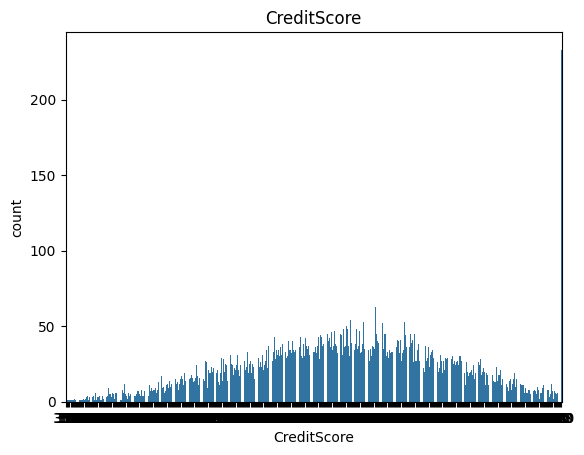

In [ ]:
sns.countplot(x='CreditScore',data=lf)
plt.title('CreditScore')
plt.show()


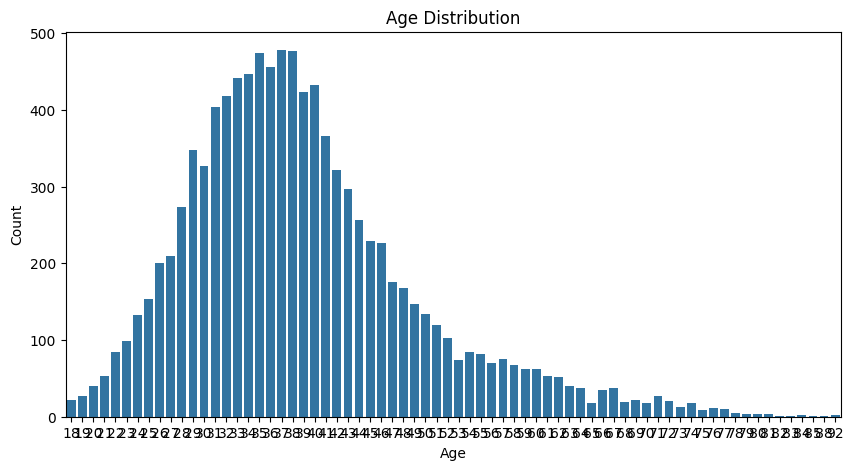

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age',data=lf)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

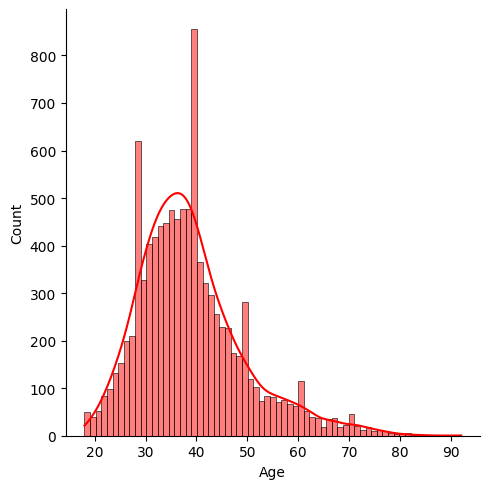

In [ ]:
sns.displot(lf.Age,kde=True,color="red")


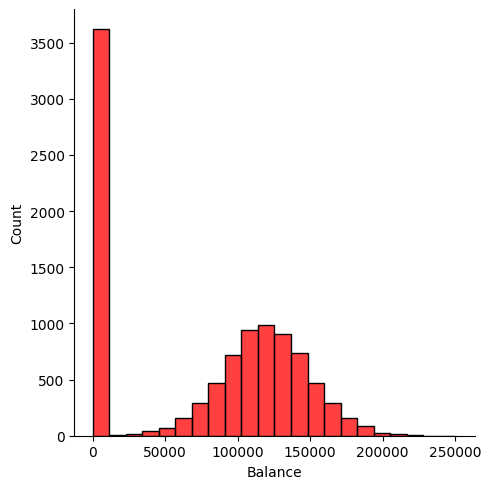

In [ ]:
sns.displot(lf.Balance,color="red")

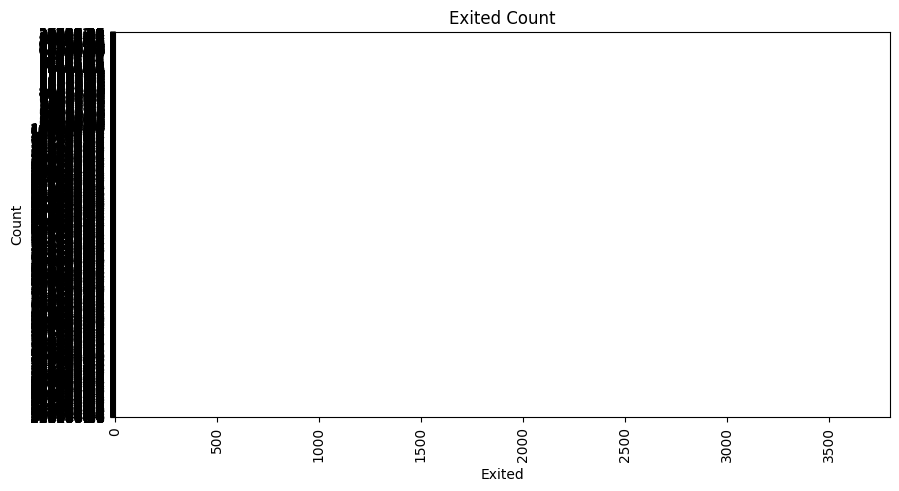

In [ ]:
plt.figure(figsize=(10,5))
count1=lf.Balance.value_counts()
sns.barplot(x=count1,y=count1.index,orient='h')
plt.xlabel("Exited")
plt.ylabel("Count")
plt.title("Exited Count")
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


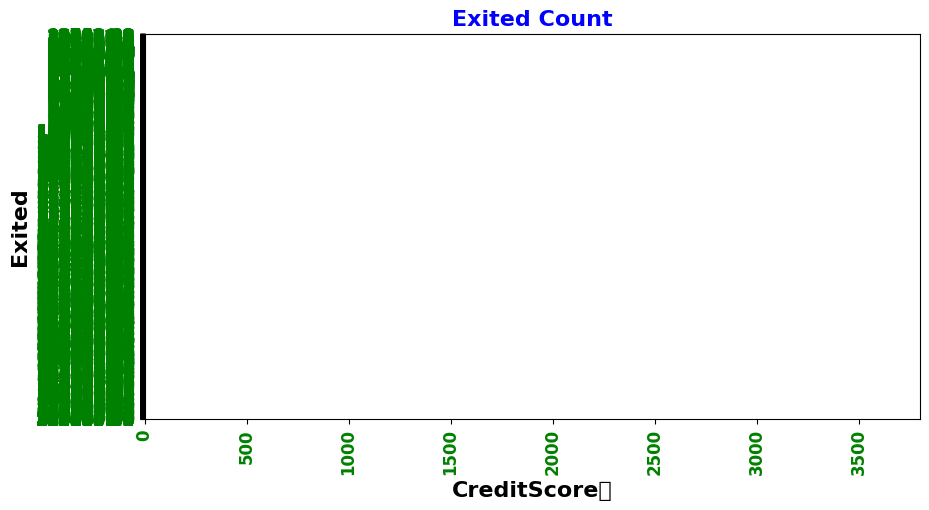

In [ ]:
plt.figure(figsize=(10,5))
count1=lf.Balance.value_counts()
sns.barplot(x=count1,y=count1.index,orient='h')
plt.xlabel('CreditScore	',fontsize=16,fontweight='bold')
plt.ylabel('Exited',fontsize=16,fontweight='bold')
plt.title('Exited Count',fontsize=16,fontweight='bold',color='blue')
plt.xticks(rotation=90,fontsize=12,fontweight='bold',color='green')
plt.yticks(fontsize=12,fontweight='bold',color='green')
plt.show()

Dropping column 'Surname' as it cannot be converted to numeric.
Dropping column 'Geography' as it cannot be converted to numeric.
Dropping column 'Gender' as it cannot be converted to numeric.


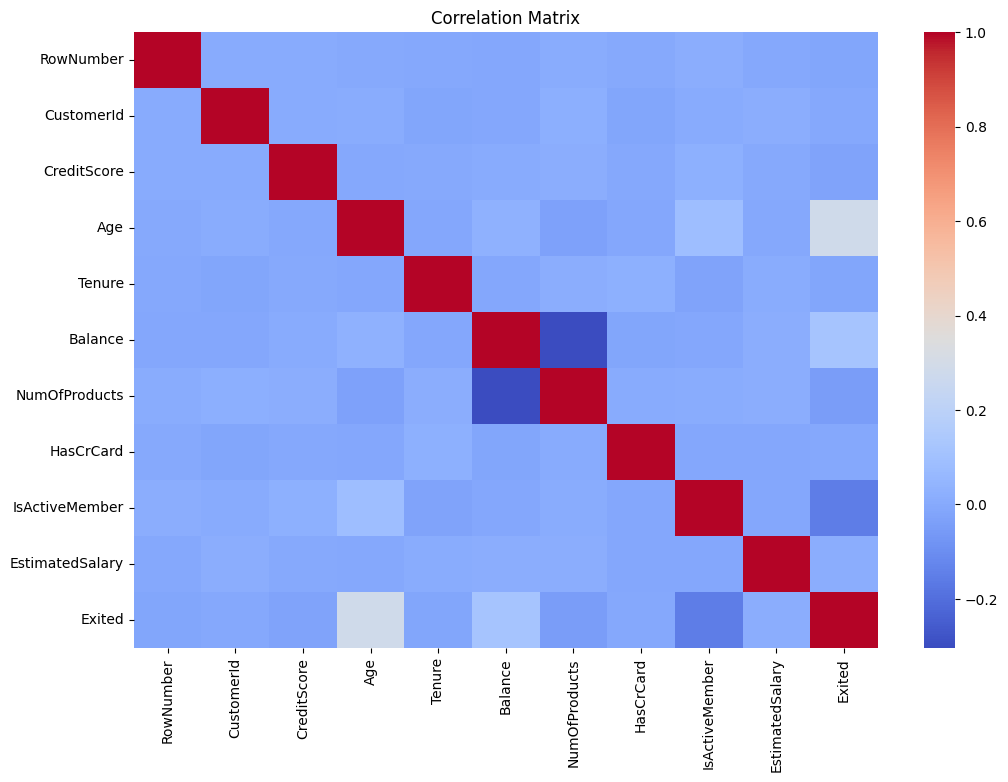

In [ ]:

for col in lf.columns:
    if lf[col].dtype == 'object':
        try:
            lf[col] = pd.to_numeric(lf[col])
        except ValueError:
            lf = lf.drop(col, axis=1)
            print(f"Dropping column '{col}' as it cannot be converted to numeric.")

correlation_matrix = lf.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
lf.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
lf=pd.get_dummies(lf,drop_first=True)

In [ ]:
lf.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x=lf.drop("Exited",axis=1)
y=lf["Exited"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
Scaler = StandardScaler()
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.transform(x_test)

In [ ]:
lr_model =LogisticRegression()

In [ ]:
lr_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
lr_predictions=lr_model.predict(x_test)

In [ ]:
print("Logistic Regression Model:")
print(confusion_matrix(y_test,lr_predictions))
print(classification_report(y_test,lr_predictions))
print("Accuracy:",accuracy_score(y_test,lr_predictions))
print("r2_Score:",r2_score(y_test,lr_predictions))
print("Precision:",precision_score(y_test,lr_predictions))
print("Recall:",recall_score(y_test,lr_predictions))
print("F1 Score:",f1_score(y_test,lr_predictions))

Logistic Regression Model:
[[1555   52]
 [ 334   59]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1607
           1       0.53      0.15      0.23       393

    accuracy                           0.81      2000
   macro avg       0.68      0.56      0.56      2000
weighted avg       0.77      0.81      0.76      2000

Accuracy: 0.807
r2_Score: -0.2223874239768444
Precision: 0.5315315315315315
Recall: 0.15012722646310434
F1 Score: 0.23412698412698418


In [ ]:
rf_model=RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)

In [ ]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [ ]:
rf_predictions=rf_model.predict(x_test)

In [ ]:
print("Random Forest Model:")
print(confusion_matrix(y_test,rf_predictions))
print(classification_report(y_test,rf_predictions))
print("Accuracy:",accuracy_score(y_test,rf_predictions))
print("r2_Score:",r2_score(y_test,rf_predictions))
print("Precision:",precision_score(y_test,rf_predictions))
print("Recall:",recall_score(y_test,rf_predictions))
print("F1 Score:",f1_score(y_test,rf_predictions))

Random Forest Model:
[[1547   60]
 [ 219  174]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.44      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Accuracy: 0.8605
r2_Score: 0.11646090339497517
Precision: 0.7435897435897436
Recall: 0.44274809160305345
F1 Score: 0.5550239234449761


In [ ]:
gb_model=GradientBoostingClassifier(n_estimators=1000,random_state=42)

In [ ]:
gb_model.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=1000, random_state=42)

In [ ]:
gb_predictions=gb_model.predict(x_test)

In [ ]:
print("Gradient Boosting Model:")
print(confusion_matrix(y_test,gb_predictions))
print(classification_report(y_test,gb_predictions))
print("Accuracy:",accuracy_score(y_test,gb_predictions))
print("r2_Score:",r2_score(y_test,gb_predictions))
print("Precision:",precision_score(y_test,gb_predictions))
print("Recall:",recall_score(y_test,gb_predictions))
print("F1 Score:",f1_score(y_test,gb_predictions))

Gradient Boosting Model:
[[1513   94]
 [ 213  180]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.66      0.46      0.54       393

    accuracy                           0.85      2000
   macro avg       0.77      0.70      0.72      2000
weighted avg       0.83      0.85      0.84      2000

Accuracy: 0.8465
r2_Score: 0.027790313054685933
Precision: 0.656934306569343
Recall: 0.4580152671755725
F1 Score: 0.5397301349325337
